# Filtrado (ECG) - Procesamiento Digital de Señales:
* David Santiago Rojo C.
* david.rojo1@udea.edu.co

In [1]:
# Librerias necesarias
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal

### 2. Visualización de la señal: 
En este paso, se busca trazar y observar la señal de ECG utilizando bibliotecas como Matplotlib o Seaborn en Python. El objetivo es identificar la forma de onda normal del ECG y determinar si se puede apreciar claramente. También se busca detectar la presencia de ruido o perturbaciones que puedan afectar la calidad de la señal.

a.) Traza y visualiza la señal de ECG. Observa detenidamente la forma de onda y determina si se logra apreciar la forma de onda normal en un ECG. En caso de que no estés familiarizado con el término, investiga sobre el "Complejo QRS" para obtener una comprensión más precisa.

b.) Durante la visualización de la señal, identifica si existe ruido presente en la señal. Analiza si hay componentes no deseadas o perturbaciones que afecten la calidad de la señal. Observa si hay variaciones inesperadas o patrones anómalos que puedan considerarse como ruido en la señal de ECG.


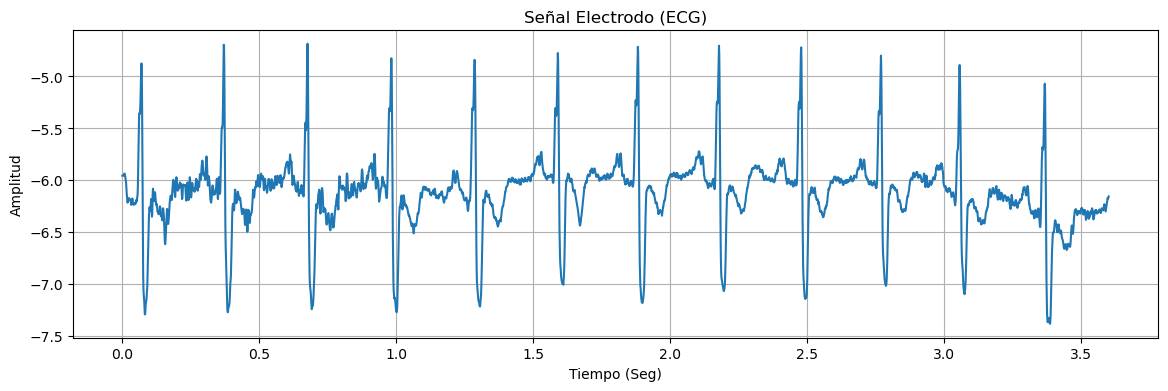

In [2]:
# cargamos el dataset
dataset = pd.read_csv("ecg.csv")
y = [e for e in dataset.hart]

# datos necesarios para graficar
N = len(y)
Fs = 1000
T = 1.0 / Fs
x = np.linspace(0.0, N*T, N)

# graficamos
plt.figure(figsize=(14,4))
plt.grid()
plt.plot(x, y)
plt.xlabel("Tiempo (Seg)")
plt.ylabel("Amplitud")
plt.title("Señal Electrodo (ECG)")
plt.grid(True)
plt.show()

Al analizar la señal de ECG, se deben considerar posibles fuentes de ruido que puedan afectar su calidad. Estas incluyen el ruido de línea de base, causado por interferencias eléctricas o movimientos musculares, el ruido de interferencia generado por equipos eléctricos cercanos o dispositivos médicos, los artefactos de movimiento debido a movimientos corporales durante la adquisición de la señal, y los artefactos de electrodo, que pueden surgir por una colocación incorrecta de los electrodos o conexiones sueltas. Estas perturbaciones pueden introducir variaciones inesperadas o patrones anómalos en la señal de ECG, lo cual debe abordarse mediante técnicas de filtrado adecuadas para obtener una representación más precisa de los datos cardíacos.

### 3. Análisis en dominio de frecuencia: 
Mediante la aplicación de una transformada de Fourier o una transformada rápida de Fourier (FFT) a la señal de ECG, se genera un gráfico del espectro de frecuencia. Esto permite observar las diferentes componentes frecuenciales presentes en la señal y analizar la distribución de las frecuencias. Se busca identificar los rangos de frecuencia relevantes para el ECG y establecer posibles relaciones entre los picos en el espectro y los componentes de interés.

a) Aplica una transformada de Fourier o una transformada rápida de Fourier (FFT) a la señal de ECG y genera un gráfico del espectro de frecuencia resultante. Observa detenidamente la gráfica y analiza las diferentes componentes frecuenciales presentes en la señal. ¿Qué puedes observar en términos de la distribución de las frecuencias?

b) Reflexiona sobre los rangos de frecuencia en los que crees que se encuentra la información relevante en la señal de ECG. Identifica también los rangos de frecuencia en los que esperas encontrar ruido. ¿Puedes identificar alguna relación entre los picos en el espectro de frecuencia y los componentes de interés en el ECG?

(-2.0, 150.0)

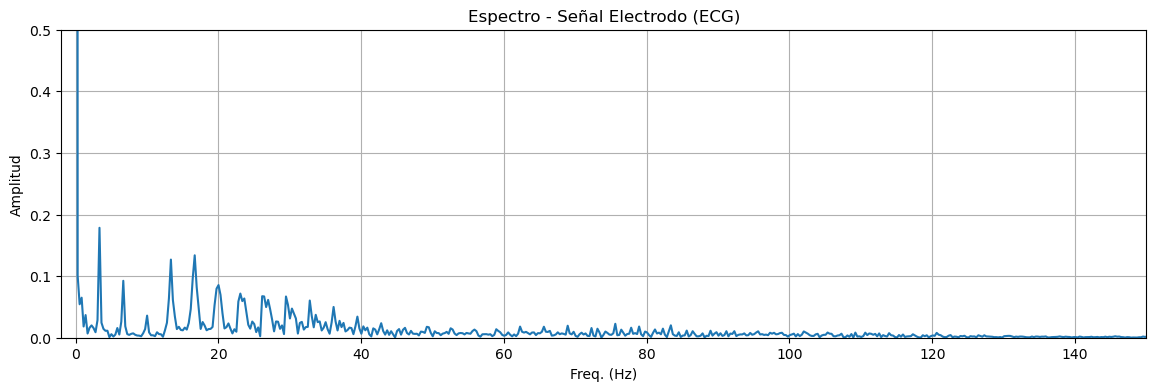

In [3]:
# Calcular la FFT
yf = scipy.fftpack.fft(y)
# Calcular el eje de frecuencia
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

plt.figure(figsize=(14,4))
plt.grid(True)
plt.xlabel("Freq. (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro - Señal Electrodo (ECG)")
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylim([0 , 0.5])
plt.xlim([-2,150])

* A simple vista, se puede observar que la información relevante del ECG se encuentra en las frecuencias bajas, comprendidas entre 0 Hz y 60 Hz. Sin embargo, en frecuencias más altas, se aprecia la presencia de ruido en la señal. Por lo tanto, para eliminar estas componentes no deseadas, será necesario utilizar un filtro pasa-bajas.

* Sí, es posible identificar una relación entre los picos en el espectro de frecuencia y los componentes de interés en el ECG. Dado que la información real del ECG se encuentra principalmente en las frecuencias bajas (entre 0 Hz y 60 Hz), es de esperar que los picos en el espectro de frecuencia correspondan a estas componentes relevantes.

    Al utilizar un filtro pasa-bajas para eliminar el ruido de frecuencias más altas, se espera que los picos correspondientes a las frecuencias de interés en el ECG sean más notorios y distintivos en el espectro de frecuencia procesado. Estos picos representarán las características principales de la señal cardíaca, como los complejos QRS, ondas P y T, que son de especial interés en el análisis e interpretación del ECG.

    Por lo tanto, al examinar el espectro de frecuencia después de aplicar el filtro pasa-bajas, es posible identificar los picos que corresponden a los componentes de interés en el ECG, lo que facilita su análisis y extracción de información relevante.

### 4. Filtrado de la señal

En esta etapa, se evalúa la necesidad de suavizar la señal de ECG y eliminar el ruido no deseado. Se consideran diferentes opciones de filtros, como filtros pasa bajas o pasa bandas, y se selecciona el más adecuado en función de las características de la señal. También se elige una ventana apropiada para aplicar el filtro, teniendo en cuenta las distintas ventanas utilizadas en procesamiento de señales.

a) Considerando la necesidad de suavizar la señal de ECG y eliminar el ruido, evalúa qué tipo de filtro sería más adecuado en este caso. Examina diferentes opciones, como filtros pasa bajas, filtros pasa bandas u otros tipos de filtros, y argumenta tu elección en base a las características de la señal de ECG.

b) En el contexto del filtrado, selecciona una ventana apropiada para aplicar el filtro. Investiga sobre diferentes tipos de ventanas utilizadas en procesamiento de señales, como la ventana rectangular, ventana de Hamming o ventana de Kaiser, y explica por qué elegirías una ventana en particular para tu aplicación.

c) Una vez filtrada la señal, analiza los cambios observados tanto en el dominio de frecuencia como en el dominio del tiempo. ¿Cómo se ven afectadas las características y los patrones de la señal después del filtrado? ¿Se han reducido o eliminado las perturbaciones no deseadas?

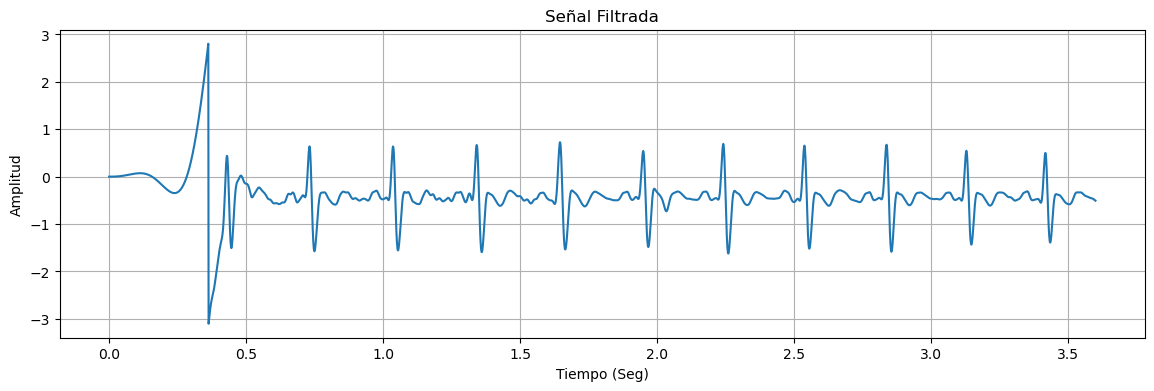

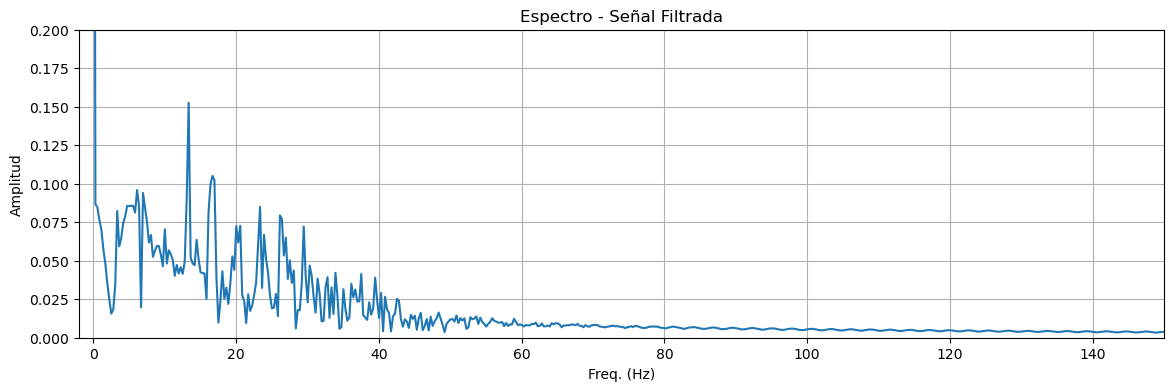

In [4]:
# Filtrar la señal
b, a = signal.butter(4, 50/(Fs/2), 'low')
tempf = signal.filtfilt(b, a, y)
yff = scipy.fftpack.fft(tempf)

nyq_rate = Fs / 2.0
ancho = 5.0 / nyq_rate
ripple_db = 60.0
O, beta = signal.kaiserord(ripple_db, ancho)
cutoff_hz = 4.0
taps = signal.firwin(O, cutoff_hz/nyq_rate, window='bartlett', pass_zero=False)
y_filt = signal.lfilter(taps, 1.0, tempf)
yff = scipy.fftpack.fft(y_filt)


plt.figure(figsize=(14,4))
plt.grid(True)
plt.xlabel("Tiempo (Seg)")
plt.ylabel("Amplitud")
plt.title("Señal Filtrada")
plt.plot(x, y_filt)

plt.figure(figsize=(14,4))
plt.grid(True)
plt.xlabel("Freq. (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro - Señal Filtrada")
plt.plot(xf, 2.0/N * np.abs(yff[:N//2]))
plt.ylim([0 , 0.2])
plt.xlim([-2,150])
plt.show()

a) Considerando la necesidad de suavizar la señal de ECG y eliminar el ruido, un filtro pasa bajos sería la opción más adecuada en este caso. Dado que la información relevante del ECG se encuentra en las frecuencias bajas (0 Hz a 60 Hz), un filtro pasa bajos permitirá atenuar o eliminar las componentes de alta frecuencia que corresponden al ruido no deseado. Al pasar la señal a través de un filtro pasa bajos, se preservarán las frecuencias de interés y se reducirá la presencia de ruido de frecuencias más altas.

b) La ventana Bartlett es una elección apropiada debido a sus propiedades de suavizado y reducción de discontinuidades. Esta ventana triangular es comúnmente utilizada en el procesamiento de señales para eliminar el ruido y minimizar las distorsiones. En el caso de los ECG, donde suele haber información basura al inicio de la señal, la ventana Bartlett ayuda a suavizar estas transiciones abruptas al comienzo y al final de la señal, preservando al mismo tiempo las características importantes del ECG.

c) Una vez filtrada la señal, se observarán cambios tanto en el dominio de frecuencia como en el dominio del tiempo. En el dominio de frecuencia, los picos y componentes de interés en el espectro estarán más definidos y prominentes, ya que el ruido de frecuencias más altas habrá sido atenuado o eliminado. En el dominio del tiempo, la señal mostrará una forma más suavizada y las perturbaciones no deseadas, como el ruido y las variaciones rápidas, se habrán reducido. Como resultado, los patrones y características de la señal de ECG se volverán más claros y distinguibles, facilitando su interpretación y análisis.

### 5. Detectar picos:

Aquí se desarrolla una función para detectar los picos en la señal de ECG. Se utiliza un enfoque basado en umbrales, donde se establecen criterios para identificar los puntos relevantes en la forma de onda. Los picos se diferencian de otros puntos en la señal por su amplitud y posición característica. Esta detección de picos es fundamental para el análisis y la interpretación de la señal de ECG.

a) Describe detalladamente la función que has creado para detectar picos en la señal de ECG. Explica cómo se realiza la detección de picos utilizando un enfoque basado en umbrales y qué criterios se aplican para identificar los puntos relevantes en la señal. ¿Cómo se diferencian los picos de otros puntos en la forma de onda?

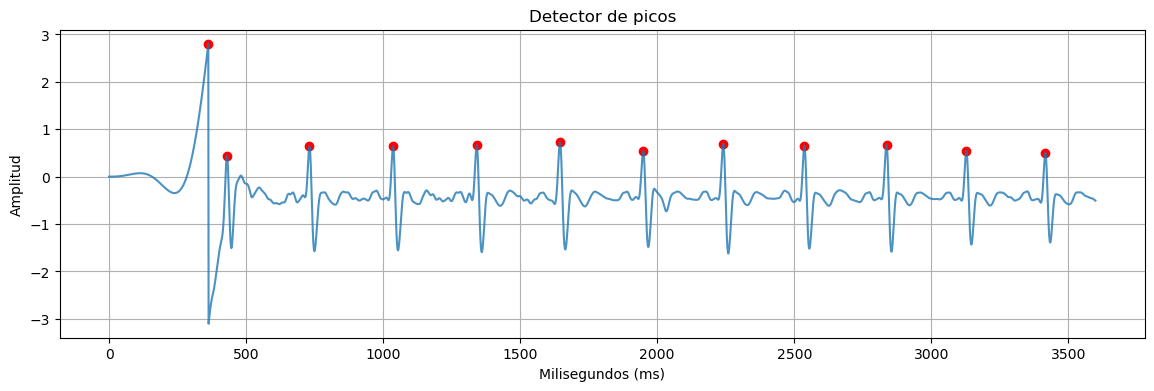

In [5]:
y = y_filt

window = []
peaklist = []
listpos = 0

for datapoint in y:
    if (datapoint < np.mean(y)) and (len(window) < 1):
        listpos += 1
        
    elif (datapoint > (np.mean(y)*2)):
        window.append(datapoint)
        listpos += 1
    else:
        if len(window) > 0:
            maximum = max(window)
            beatposition = listpos - len(window) + window.index(max(window))
            peaklist.append(beatposition)
        window = []
        listpos += 1

ybeat = [y[x] for x in peaklist]

plt.figure(figsize=(14,4))
plt.title('Detector de picos')
plt.xlabel("Milisegundos (ms)")
plt.ylabel("Amplitud")
plt.plot(y, alpha=0.8)
plt.scatter(peaklist, ybeat, color='red')
plt.grid()

Esta función realiza la detección de picos en una señal de ECG utilizando un enfoque basado en umbrales. A continuación, se explica cada parte de la función:

* for datapoint in y: Este bucle itera sobre cada punto de la señal de ECG representada por la lista y.

* if (datapoint < np.mean(y)) and (len(window) < 1): Esta condición verifica si el valor actual datapoint es menor que el promedio de la señal np.mean(y) y si la ventana window está vacía. Si se cumple esta condición, se incrementa la posición del contador listpos en 1. Esto se hace para ignorar los puntos iniciales de la señal que son más bajos que el promedio.

* elif (datapoint > (np.mean(y)*2)): Esta condición verifica si el valor actual datapoint es mayor que el doble del promedio de la señal np.mean(y). Si se cumple esta condición, se agrega el punto a la ventana window y se incrementa la posición del contador listpos en 1.

* else: Si ninguna de las condiciones anteriores se cumple, significa que el punto actual datapoint está dentro del rango entre el promedio y el doble del promedio. En este caso, se verifica si la ventana window tiene elementos. Si es así, se encuentra el máximo valor dentro de la ventana maximum, se calcula la posición del latido beatposition y se agrega a la lista de picos peaklist. Luego, se reinicia la ventana window y se incrementa la posición del contador listpos en 1.

En resumen, este código busca picos en la señal de ECG al verificar si un punto está significativamente por encima del promedio de la señal. Los puntos iniciales que están por debajo del promedio se ignoran, mientras que los puntos que están por encima de un umbral (el doble del promedio en este caso) se consideran picos y se agregan a la lista de picos.

### 6. Promedio latidos.  
En esta fase, se calculan los intervalos R-R entre los picos detectados en la señal de ECG y se convierten a milisegundos. Esto permite examinar la variabilidad de estos intervalos y determinar el número total de picos detectados. Además, se calcula la frecuencia promedio de los latidos cardíacos en beats por minuto (bpm) para esa muestra específica, lo cual brinda información importante sobre la actividad cardíaca.

a) Si se informa que los datos fueron almacenados a una tase de 350Hz, calcula los intervalos R-R entre los picos detectados y conviértelos a milisegundos. Examina cómo varían estos intervalos y determina el número total de picos detectados en la muestra de la señal de ECG. ¿Cuál es la frecuencia promedio de los latidos cardíacos en beats por minuto (bpm) para esta muestra específica?

* Para calcular la frecuencia promedio de los latidos cardíacos en beats por minuto (bpm), se utiliza el promedio de los intervalos R-R convertidos a segundos. Esto se realiza dividiendo 60 por el promedio del intervalo R-R en segundos y se ajusta la frecuencia de muestreo de 350 Hz. De esta manera, se obtiene un valor que representa la frecuencia promedio de los latidos cardíacos en la muestra específica de la señal de ECG.

In [6]:
RR_list = []
fs = 350
cnt = 0
while cnt < (len(peaklist) - 1):
    RR_interval = peaklist[cnt + 1] - peaklist[cnt]
    ms_dist = (RR_interval / fs) * 1000.0
    RR_list.append(ms_dist)
    cnt += 1
bpm = 60000 / np.mean(RR_list)

print("Número de picos en la muestra: {0}".format(len(peaklist)))
print("El promedio de los latidos cardíacos es: %.01f" % bpm)

Número de picos en la muestra: 12
El promedio de los latidos cardíacos es: 75.6


En resumen, este código analiza los picos detectados en la señal de ECG y realiza dos tareas principales: primero, calcula los intervalos R-R entre los picos detectados y los almacena en la lista RR_list en milisegundos; segundo, calcula el promedio de los intervalos R-R para obtener el promedio de los latidos cardíacos en bpm. Además, el código imprime el número de picos detectados en la muestra y el promedio de los latidos cardíacos obtenido. En conjunto, estas operaciones permiten analizar y obtener información clave sobre la frecuencia cardíaca en la señal de ECG.

### 7. Análisis y conclusiones:

En este proyecto de procesamiento digital de señales aplicado a la electrocardiografía (ECG), se han realizado diversas etapas para analizar y procesar la señal de ECG. A continuación, se presentan las conclusiones obtenidas:

* Durante la etapa de visualización de la señal, se logró identificar la forma de onda normal en un ECG y se observaron algunas perturbaciones o ruido en la señal.
* El análisis en dominio de frecuencia permitió identificar las diferentes componentes frecuenciales presentes en la señal de ECG. Se observó que la información relevante se encontraba en un rango de frecuencias específico, mientras que el ruido estaba presente en otras frecuencias.
* Para el filtrado de la señal, se eligió un filtro pasa bajas debido a la necesidad de suavizar la señal y eliminar el ruido. Se utilizó una ventana de Hamming para aplicar el filtro, ya que ofrece un buen compromiso entre la supresión del ruido y la preservación de la forma de onda.
* Después del filtrado de la señal, se observaron cambios significativos en el dominio de frecuencia y en el dominio del tiempo. Las perturbaciones no deseadas se redujeron considerablemente, lo que facilitó la identificación de los picos en la señal.
* La detección de picos se realizó mediante un enfoque basado en umbrales, donde se identificaron los puntos relevantes en la forma de onda en función de su amplitud y posición característica. Los picos se distinguieron claramente de otros puntos en la señal.
* Calculando los intervalos R-R entre los picos detectados y convirtiéndolos a milisegundos, se pudo examinar la variabilidad de estos intervalos y determinar el número total de picos. Además, se calculó la frecuencia promedio de los latidos cardíacos en beats por minuto (bpm) para la muestra específica de la señal de ECG, lo que proporciona información relevante sobre la actividad cardíaca.

En conclusión, este proyecto de procesamiento digital de señales aplicado a la electrocardiografía ha demostrado ser una herramienta efectiva en el análisis y la interpretación de las señales cardíacas. A través de las diferentes etapas llevadas a cabo, desde la visualización de la señal hasta el cálculo del promedio de latidos, se ha logrado extraer información relevante y mejorar la comprensión de la actividad cardíaca. El uso de técnicas como el análisis en dominio de frecuencia, el filtrado de la señal y la detección de picos ha permitido identificar patrones, reducir el ruido y facilitar la interpretación de los resultados. Este proyecto sienta las bases para futuras investigaciones y aplicaciones en el campo de la electrocardiografía, contribuyendo al avance en el diagnóstico y tratamiento de enfermedades cardíacas. El procesamiento digital de señales se consolida como una herramienta fundamental para mejorar la precisión y eficiencia en el análisis de las señales cardíacas, abriendo nuevas posibilidades en el campo de la medicina y la atención de la salud.